#### 一：实验目的和要求
1．掌握利用Python实现K-Means聚类分析的方法<br>
2．掌握利用Python实现系统聚类分析的方法

#### 二：内容和方法
分别使用K-means和系统聚类分析方法实现对手写数字识别。步骤如下：<br>
1.导入digits数据：<br>
from sklearn.datasets import load_digits<br>
digits = load_digits() <br>
2.标准化数据和PCA降维。（可选步骤）<br>
3.聚类，并想办法获取每个类代表的是什么数字（标签）。<br>
4.利用聚类结果，对每个样本预测其类别，并根据真实的类别计算错误率。<br>

In [10]:
# 1
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()

In [11]:
target,data = digits['target'],digits['data']
target.shape,data.shape

((1797,), (1797, 64))

In [12]:
# 2
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# 标准化
data_standar = scale(digits.data)
n_digits = len(np.unique(digits.target))
# scaler = StandardScaler()
# scaler.fit(data)
# data_standar=scaler.transform(data)

In [13]:
# 降维
pca = PCA(n_components=2).fit(data_standar)
data_standar_pca = pca.transform(data_standar)
data_standar_pca.shape

(1797, 2)

In [14]:
# 3 K-means
from sklearn.cluster import KMeans
y_Km = KMeans(n_clusters=n_digits, random_state=None).fit(data_standar_pca)
y_Km.labels_,y_Km.cluster_centers_

(array([1, 2, 1, ..., 1, 1, 3]), array([[-2.660233  ,  1.66181929],
        [ 1.72561191, -1.47894535],
        [-0.33435832,  0.66445662],
        [-1.83466862, -1.34888742],
        [ 4.9507192 , -0.68969002],
        [ 0.08780469,  3.63296271],
        [-4.55398894, -0.84136407],
        [ 2.12170077,  1.64751154],
        [ 1.21000665, -3.93775859],
        [ 4.16883125,  5.59717239]]))

In [15]:
# 4_1
y_pred = y_Km.predict(data_standar_pca)
y_pred[:100],target[:100]

(array([1, 2, 1, 3, 4, 3, 8, 5, 3, 3, 4, 7, 3, 0, 4, 0, 8, 7, 2, 3, 1, 7,
        3, 5, 4, 2, 8, 9, 2, 3, 1, 3, 0, 0, 8, 0, 1, 3, 2, 6, 0, 4, 7, 7,
        5, 3, 2, 7, 8, 8, 2, 7, 9, 2, 7, 1, 7, 7, 8, 0, 0, 7, 0, 0, 4, 8,
        8, 8, 1, 0, 7, 0, 1, 3, 3, 7, 0, 7, 8, 8, 7, 5, 8, 0, 6, 7, 7, 7,
        8, 0, 7, 0, 3, 7, 5, 1, 2, 4, 0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
        7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
        6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
        6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1]))

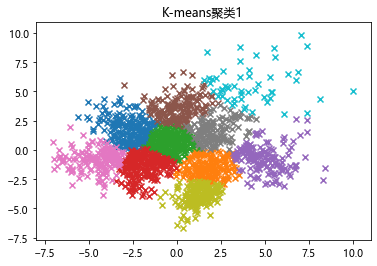

In [16]:
import matplotlib.pyplot as plt
plt.title("K-means聚类1")
for i in range(n_digits):
    plt.scatter(data_standar_pca[y_pred==i][:, 0], data_standar_pca[y_pred==i][:, 1], marker='x')

In [17]:
# 错误率
(y_pred!=target).mean()

0.8647746243739566

In [9]:
# 4_2
# 系统聚类
from sklearn.cluster import AgglomerativeClustering
y_pred_system = AgglomerativeClustering(affinity='euclidean',linkage='ward',n_clusters=10).fit_predict(data_standar_pca)
y_pred_system

array([5, 2, 2, ..., 2, 2, 6], dtype=int64)

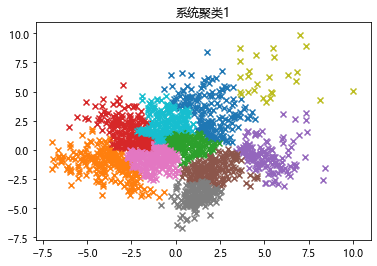

In [10]:
plt.title("系统聚类1")
for i in range(n_digits):
    plt.scatter(data_standar_pca[y_pred_system==i][:, 0], data_standar_pca[y_pred_system==i][:, 1], marker='x')

In [29]:
# 错误率
# (y_pred_system!=target).sum() / len(target)